In [2]:
import pandas
import sklearn
import csv
from datetime import datetime
import time
import numpy as np 
from sklearn.cluster import KMeans

df = pandas.read_csv('./yellow_tripdata_2016-01.csv')
test = df.head()
print(test)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2016-01-01 00:00:00   2016-01-01 00:00:00                2   
1         2  2016-01-01 00:00:00   2016-01-01 00:00:00                5   
2         2  2016-01-01 00:00:00   2016-01-01 00:00:00                1   
3         2  2016-01-01 00:00:00   2016-01-01 00:00:00                1   
4         2  2016-01-01 00:00:00   2016-01-01 00:00:00                3   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           1.10        -73.990372        40.734695           1   
1           4.90        -73.980782        40.729912           1   
2          10.54        -73.984550        40.679565           1   
3           4.75        -73.993469        40.718990           1   
4           1.76        -73.960625        40.781330           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.981842         40.732407             2

In [3]:
def toSeconds(t):
    d = datetime.strptime(t, "%Y-%m-%d %H:%M:%S")
    return (time.mktime(d.timetuple())-1451624400)

In [4]:
df2 = df[(df.index>=0) & (df.index<=1000000)]

In [5]:
tpu = df2.tpep_pickup_datetime
tdo = df2.tpep_dropoff_datetime

spu = []
sdo = []
for i in range(0,len(tpu)):
    spu.append(toSeconds(tpu[i]))
    sdo.append(toSeconds(tdo[i]))

In [6]:
df2.loc[0:len(df2),'pt'] = np.array(spu)
df2.loc[0:len(df2),'dt'] = np.array(sdo)
print(df2.head())

/anaconda/envs/OSMNX/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda/envs/OSMNX/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2016-01-01 00:00:00   2016-01-01 00:00:00                2   
1         2  2016-01-01 00:00:00   2016-01-01 00:00:00                5   
2         2  2016-01-01 00:00:00   2016-01-01 00:00:00                1   
3         2  2016-01-01 00:00:00   2016-01-01 00:00:00                1   
4         2  2016-01-01 00:00:00   2016-01-01 00:00:00                3   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           1.10        -73.990372        40.734695           1   
1           4.90        -73.980782        40.729912           1   
2          10.54        -73.984550        40.679565           1   
3           4.75        -73.993469        40.718990           1   
4           1.76        -73.960625        40.781330           1   

  store_and_fwd_flag  dropoff_longitude ...   payment_type  fare_amount  \
0                  N         -73.981842 ...              2          7.5

In [8]:
df3 = df2.sort_values('pt')
df3 = df3.reset_index(drop=True)

In [9]:
for i in range(0, len(df3)):
    if df3.pt[i] >= 172800:
        start = i
        break

for j in range(0, len(df3)):
    if df3.pt[j] >= 259199:
        end = j
        break    

In [10]:
print(start,end)

636757 939589


In [11]:
df3 = df3[(df3.index >= start) & (df3.index <= end-1)]
df_oneday = df3[(df3.pickup_longitude >= -74.2) & (df3.pickup_longitude <= -73.7) & (df3.pickup_latitude >= 40.5) & (df.pickup_latitude <= 40.9) & (df3.dropoff_longitude >= -74.3) & (df3.dropoff_longitude <= -73.4) & (df3.dropoff_latitude >= 40.3) & (df3.dropoff_latitude <= 41.3)]
df_oneday = df_oneday.reset_index(drop = True)
print(df_oneday)

/anaconda/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2016-01-03 00:00:00   2016-01-03 00:02:39                1   
1              1  2016-01-03 00:00:00   2016-01-03 00:12:19                1   
2              2  2016-01-03 00:00:00   2016-01-03 00:06:11                1   
3              2  2016-01-03 00:00:00   2016-01-03 00:00:00                2   
4              2  2016-01-03 00:00:00   2016-01-03 00:04:50                1   
5              2  2016-01-03 00:00:01   2016-01-03 00:03:31                1   
6              1  2016-01-03 00:00:02   2016-01-03 00:15:09                1   
7              1  2016-01-03 00:00:03   2016-01-03 00:19:52                1   
8              2  2016-01-03 00:00:03   2016-01-03 00:09:20                1   
9              2  2016-01-03 00:00:03   2016-01-03 00:13:58                6   
10             2  2016-01-03 00:00:03   2016-01-03 00:05:01                1   
11             2  2016-01-03 00:00:04   

In [12]:
data = []

for i in range(0,len(df_oneday)):
    punode = []
    donode = []
    punode.append(df_oneday.get_value(i,'pickup_longitude'))
    punode.append(df_oneday.get_value(i,'pickup_latitude'))
    donode.append(df_oneday.get_value(i,'dropoff_longitude'))
    donode.append(df_oneday.get_value(i,'dropoff_latitude'))
    data.append(punode)
    data.append(donode)
print(len(data))

/anaconda/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/anaconda/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda/envs/OSMNX/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


594588


In [13]:
df_oneday.to_pickle('./oneday')

In [99]:
from sklearn.cluster import KMeans
X = np.array(data)
kmeans = KMeans(n_clusters=200, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[ 93 119  56 ...  89 193  83]
[[-73.97170646  40.75679917]
 [-73.78259625  40.64549715]
 [-74.00081455  40.73952517]
 [-73.87253577  40.77392671]
 [-73.95212579  40.77218003]
 [-73.94192974  40.83740376]
 [-73.951947    40.67458075]
 [-74.00889287  40.71356984]
 [-73.97821434  40.78537567]
 [-73.98468916  40.74391988]
 [-74.17889174  40.69261836]
 [-73.99042663  40.71772422]
 [-73.98960495  40.75999311]
 [-73.95726833  40.8159816 ]
 [-73.95633294  40.71711997]
 [-73.99616952  40.6841063 ]
 [-73.91252222  40.76358038]
 [-73.83237938  40.87841415]
 [-73.94405242  40.79049208]
 [-73.82459591  40.70647805]
 [-73.66264069  40.75455383]
 [-73.96619008  40.80324705]
 [-73.86970479  40.86715705]
 [-73.98169083  40.77431601]
 [-73.95269479  40.58574079]
 [-73.91803247  40.70342691]
 [-73.99134074  40.75000621]
 [-73.95431935  40.77856691]
 [-73.99445335  40.73151533]
 [-73.64861908  41.17122574]
 [-73.81689398  40.73458862]
 [-74.00695273  40.64728558]
 [-74.006407    40.73327697]
 [-73.9843431

In [103]:
import matplotlib.pyplot as plt

hubs = kmeans.cluster_centers_
log = []
lat = []
for i in range(0,len(hubs)):
    log.append(hubs[i][0])
    lat.append(hubs[i][1])
    

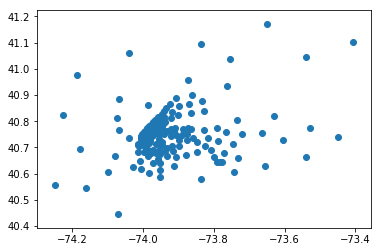

[-73.9903519   40.73476487]


In [116]:
plt.scatter(log, lat)
plt.show()
print(hubs[56])

In [117]:
print(data[4])

[-73.98751068115234, 40.74135971069336]


In [113]:
labels = kmeans.labels_
puhub = []
dohub = []
for i in range(0,len(labels)):
    if np.mod(i,2)==0:
        puhub.append(labels[i])
    else:
        dohub.append(labels[i])

In [121]:
df_oneday['puhub_id'] = np.array(puhub)
df_oneday['dohub_id'] = np.array(dohub)

In [123]:
print(df_oneday)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2016-01-03 00:00:00   2016-01-03 00:02:39                1   
1              1  2016-01-03 00:00:00   2016-01-03 00:12:19                1   
2              2  2016-01-03 00:00:00   2016-01-03 00:06:11                1   
3              2  2016-01-03 00:00:00   2016-01-03 00:00:00                2   
4              2  2016-01-03 00:00:00   2016-01-03 00:04:50                1   
5              2  2016-01-03 00:00:01   2016-01-03 00:03:31                1   
6              1  2016-01-03 00:00:02   2016-01-03 00:15:09                1   
7              1  2016-01-03 00:00:03   2016-01-03 00:19:52                1   
8              2  2016-01-03 00:00:03   2016-01-03 00:09:20                1   
9              2  2016-01-03 00:00:03   2016-01-03 00:13:58                6   
10             2  2016-01-03 00:00:03   2016-01-03 00:05:01                1   
11             2  2016-01-03 00:00:04   

In [124]:
def ManhattanDistance(x,y):
    logdiff = np.abs(hubs[x][0]-hubs[y][0])
    latdiff = np.abs(hubs[x][1]-hubs[y][1])
    distance = latdiff*111 + np.cos((hubs[x][1]+hubs[y][1])/np.pi)*111.321*logdiff
    return distance

In [126]:
print(ManhattanDistance(56,27))

7.616789983596123
